In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
plt.rc('figure', figsize=(10, 5))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the data from the UNRATE Excel file
unrate = pd.read_excel('/content/drive/MyDrive/CP project/Project/Raw Datasets/UNRATE.xlsx', sheet_name="Monthly", names=["Observation Date", "UNRATE"])

# Set the "Observation Date" column as the index
unrate.set_index([unrate.columns[0]], inplace=True)

# Convert the index to datetime format
unrate.index = pd.to_datetime(unrate.index)

# Resample the data to yearly frequency and calculate the average UNRATE for each year
unrate = unrate.resample("Y").mean()

# Display the processed data
unrate

<ipython-input-7-8b6906d06a8d>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  unrate = unrate.resample("Y").mean()


,UNRATE
Observation Date,
1948-12-31,3.750000
1949-12-31,6.050000
1950-12-31,5.208333
1951-12-31,3.283333
1952-12-31,3.025000
...,...
2020-12-31,8.091667
2021-12-31,5.350000
2022-12-31,3.633333


<ipython-input-8-f3a142f0e635>:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  x_ticks = pd.date_range(start="1948-01-01", end="2024-12-31", freq="5Y")  # Include more years


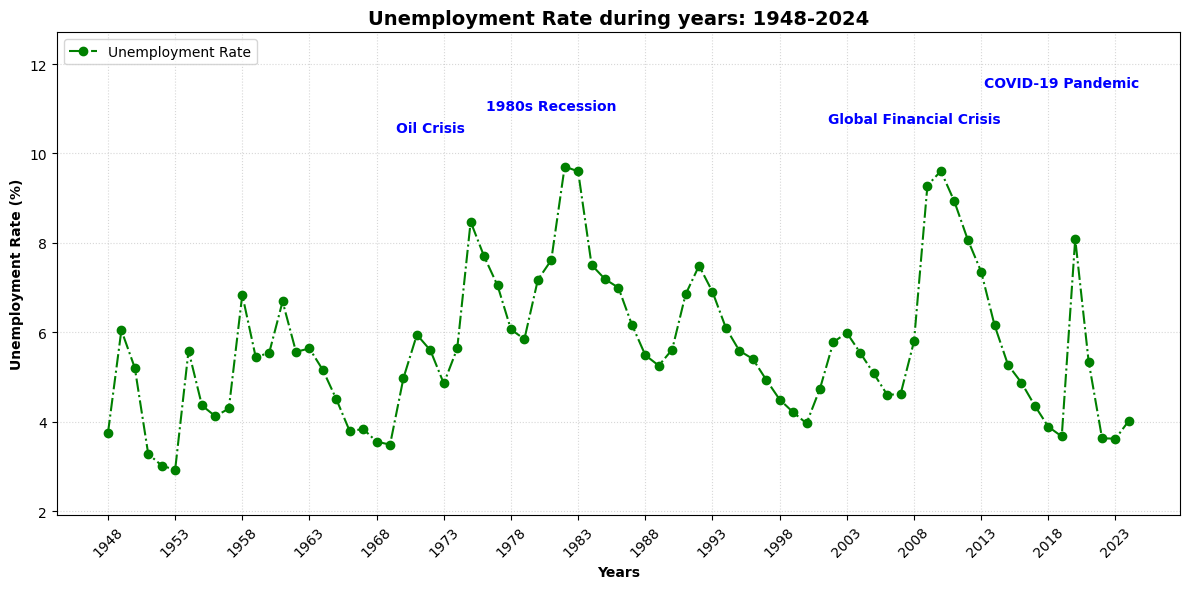

In [8]:

# Create the figure and axis
fig = plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
ax = fig.add_subplot(1, 1, 1)

# Plot the unemployment rate
ax.plot(unrate.index, unrate["UNRATE"], color="green", linestyle="-.", marker="o", label="Unemployment Rate")

# Set titles and labels
ax.set_title('Unemployment Rate during years: 1948-2024', fontsize=14, fontweight="bold")
ax.set_xlabel('Years', fontsize=10, fontweight="bold")
ax.set_ylabel('Unemployment Rate (%)', fontsize=10, fontweight="bold")

# Add legend
ax.legend(loc="upper left")

# Enable grid with custom properties
ax.grid(True, linestyle=":", alpha=0.5)

# Define crisis dates and labels
crisis_date = [
    (datetime(1973, 12, 31), "Oil Crisis", 0.5, datetime(1972, 12, 31)),
    (datetime(1982, 12, 31), "1980s Recession", 1, datetime(1981, 12, 31)),
    (datetime(2009, 12, 31), "Global Financial Crisis", 0.7, datetime(2008, 12, 31)),
    (datetime(2020, 12, 31), "COVID-19 Pandemic", 1.5, datetime(2019, 12, 31))
]

# Annotating each crisis
for date, label, disp, date_text in crisis_date:
    ax.annotate(label, xy=(date, unrate["UNRATE"].max() + disp),
                xytext=(date_text, unrate["UNRATE"].max() + disp + 0.2),
                fontsize=10, fontweight="bold", color="blue", ha="center", va="bottom")

# Set x-ticks for every 5 years,
x_ticks = pd.date_range(start="1948-01-01", end="2024-12-31", freq="5Y")  # Include more years
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks.year, rotation=45)

# Adjust the y-axis to accommodate text labels
ax.set_ylim(min(unrate["UNRATE"]) - 1, max(unrate["UNRATE"]) + 3)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap of elements
plt.show()





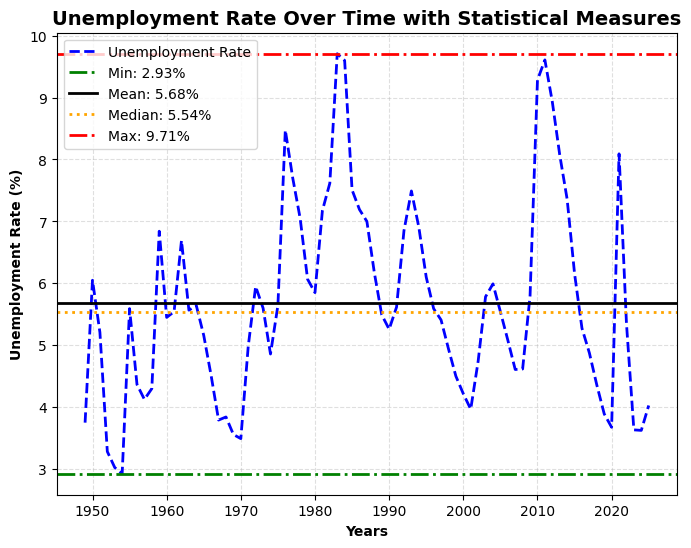

In [9]:

# Plot the line graph for Unemployment Rate
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(unrate.index, unrate["UNRATE"], label="Unemployment Rate", color="blue", linestyle="--", linewidth=2)

# Calculate statistics
min_val = unrate["UNRATE"].min()
max_val = unrate["UNRATE"].max()
mean = unrate["UNRATE"].mean()
median = unrate["UNRATE"].median()

# Add horizontal lines for statistical measures
ax.axhline(min_val, color='green', linestyle='-.', linewidth=2, label=f"Min: {min_val:.2f}%")
ax.axhline(mean, color='black', linestyle='-', linewidth=2, label=f"Mean: {mean:.2f}%")
ax.axhline(median, color='orange', linestyle=':', linewidth=2, label=f"Median: {median:.2f}%")
ax.axhline(max_val, color='red', linestyle='-.', linewidth=2, label=f"Max: {max_val:.2f}%")

# Add scatter points for min, mean, median, and max
#ax.scatter(unrate.index[0], min_val, color='green', s=100, zorder=5)
#ax.scatter(unrate.index[0], mean, color='red', s=100, zorder=5)
#ax.scatter(unrate.index[0], median, color='blue', s=100, zorder=5)
#ax.scatter(unrate.index[0], max_val, color='purple', s=100, zorder=5)

# Annotate the statistical measures
#ax.text(unrate.index[0], min_val, f"Min: {min_val:.2f}%", color='green', fontsize=10)
#ax.text(unrate.index[0], mean, f"Mean: {mean:.2f}%", color='orange', fontsize=10)
#ax.text(unrate.index[0], median, f"Median: {median:.2f}%", color='red', fontsize=10)
#ax.text(unrate.index[0], max_val, f"Max: {max_val:.2f}%", color='purple', fontsize=10)

# Set labels and title
ax.set_title("Unemployment Rate Over Time with Statistical Measures", fontsize=14, fontweight="bold")
ax.set_xlabel("Years", fontsize=10, fontweight="bold")
ax.set_ylabel("Unemployment Rate (%)", fontsize=10, fontweight="bold")
ax.grid(True, linestyle="--", alpha=0.4)

# Add a legend
ax.legend(loc="upper left")

plt.show()


In [10]:

# Load the election data
election_data = pd.read_csv('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/Election Dataset Cleaned.csv', skiprows=[1, 2, 3, 4, 25], index_col=["Year"])

# Create a copy of the unrate data for the election analysis
if "1947-12-31" in unrate.index:
    unrate_for_election = unrate.copy().drop("1947-12-31")
else:
    unrate_for_election = unrate.copy()
# Create a list of election years from 1948 to 2024
elections_years = list(range(1948, 2025, 4))

# List to hold the results for each election year
unrate_for_elections = []

# Loop through each election year and calculate the unemployment rate for the previous 4 years
for year in elections_years:
    # Select the unemployment rate data for the previous 4 years
    unrate_period = unrate_for_election[(unrate_for_election.index.year >= (year - 4)) & (unrate_for_election.index.year < year)]

    # Sum of unemployment rates for the 4-year period (average in this case)
    average_unrate = unrate_period["UNRATE"].mean()  # Use mean to summarize the unemployment rate for the period

    # Append the result to the list
    unrate_for_elections.append({"election year": year, "previous 4 year average unemployment rate": average_unrate})

# Create a DataFrame for the results
unrate_election_df = pd.DataFrame(unrate_for_elections)

# Display the DataFrame
unrate_election_df


,election year,previous 4 year average unemployment rate
0,1948,NaN
1,1952,4.572917
2,1956,3.977083
3,1960,5.179167
4,1964,5.860417
5,1968,4.325000
6,1972,4.495833
7,1976,6.143750
8,1980,6.666667
9,1984,8.525000


In [11]:
#merge election and gdp
unrate_for_elections=pd.merge(unrate_election_df, election_data, left_on="election year", right_index=True, how="inner")
unrate_for_elections

,election year,previous 4 year average unemployment rate,Voting-age Population (VAP),Turnout,VAP Turnout,President,President's Party,Mandate Years,Democratic,Libertarian,Other,Republican
0,1948,NaN,95573000,48833680,51.1,Harry S. Truman,Democratic,1945/1953,NaN,NaN,NaN,NaN
1,1952,4.572917,99929000,61551919,61.6,Dwight D. Eisenhower,Republican,1953/1961,NaN,NaN,NaN,NaN
2,1956,3.977083,104515000,62027040,59.3,Dwight D. Eisenhower,Republican,1953/1961,NaN,NaN,NaN,NaN
3,1960,5.179167,109672000,68836385,62.8,John F. Kennedy,Democratic,1961/1963,NaN,NaN,NaN,NaN
4,1964,5.860417,114090000,70097935,61.4,Lyndon B. Johnson,Democratic,1963/1969,NaN,NaN,NaN,NaN
5,1968,4.325000,120285000,73026831,60.7,Richard Nixon,Republican,1969/1974,NaN,NaN,NaN,NaN
6,1972,4.495833,140777000,77625152,55.1,Richard Nixon,Republican,1969/1974,NaN,NaN,NaN,NaN
7,1976,6.143750,152308000,81603346,53.6,Jimmy Carter,Democratic,1977/1981,40680446.0,95626.0,1954379.0,38870893.0
8,1980,6.666667,163945000,86496851,52.8,Ronald Reagan,Republican,1981/1989,35480948.0,867401.0,6505863.0,43642639.0
9,1984,8.525000,173995000,92654861,53.3,Ronald Reagan,Republican,1981/1989,37449813.0,227204.0,811015.0,54166829.0


In [12]:
party_color_map = {
    'Republican': 'red',
    'Democratic': 'blue',
    'Libertarian': 'green',
    'Other': 'grey'
}

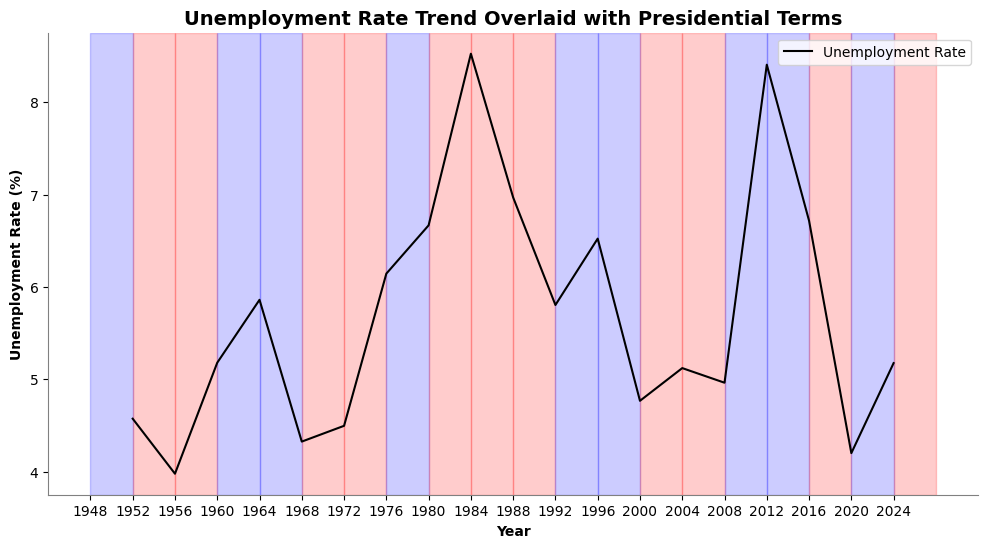

In [13]:
plt.figure(figsize=(12, 6))

# Create the line plot for unemployment rate over the years
ax = sns.lineplot(data=unrate_for_elections, x='election year', y='previous 4 year average unemployment rate', color='black', label='Unemployment Rate')

# Loop through election years and add shaded regions for presidential terms
for i, row in unrate_for_elections.iterrows():  # Assuming you have election years from the previous DataFrame
    color = 'blue' if row["President's Party"] == 'Democratic' else 'red'
    # Add shaded region for presidential term, represented by the election year and the next 4 years
    plt.axvspan(row['election year'], row['election year'] + 4, color=color, alpha=0.2)

# Customize the title and labels for the unemployment rate graph
ax.set_title("Unemployment Rate Trend Overlaid with Presidential Terms", fontsize=14, fontweight="bold")
ax.set_xlabel("Year", fontsize=10, fontweight="bold")
ax.set_ylabel("Unemployment Rate (%)", fontsize=10, fontweight="bold")

# Set x-ticks to be the election years for better alignment
ax.set_xticks(elections_years)

# Remove the top and right spines and customize left and bottom spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("gray")
ax.spines["bottom"].set_color("gray")

# Show the plot
plt.show()



In [14]:
#average gdp and political party:

party_incharge=pd.DataFrame(unrate_for_elections, columns=["election year","previous 4 year average unemployment rate","President's Party"])
party_in_charge_s=pd.Series(party_incharge["President's Party"]).shift(1)
party_incharge["Party in charge"]=party_in_charge_s
party_incharge

,election year,previous 4 year average unemployment rate,President's Party,Party in charge
0,1948,NaN,Democratic,None
1,1952,4.572917,Republican,Democratic
2,1956,3.977083,Republican,Republican
3,1960,5.179167,Democratic,Republican
4,1964,5.860417,Democratic,Democratic
5,1968,4.325000,Republican,Democratic
6,1972,4.495833,Republican,Republican
7,1976,6.143750,Democratic,Republican
8,1980,6.666667,Republican,Democratic
9,1984,8.525000,Republican,Republican


<ipython-input-15-d01225528ce7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Party in charge', y='previous 4 year average unemployment rate', data=party_incharge, inner="quart", palette="muted")


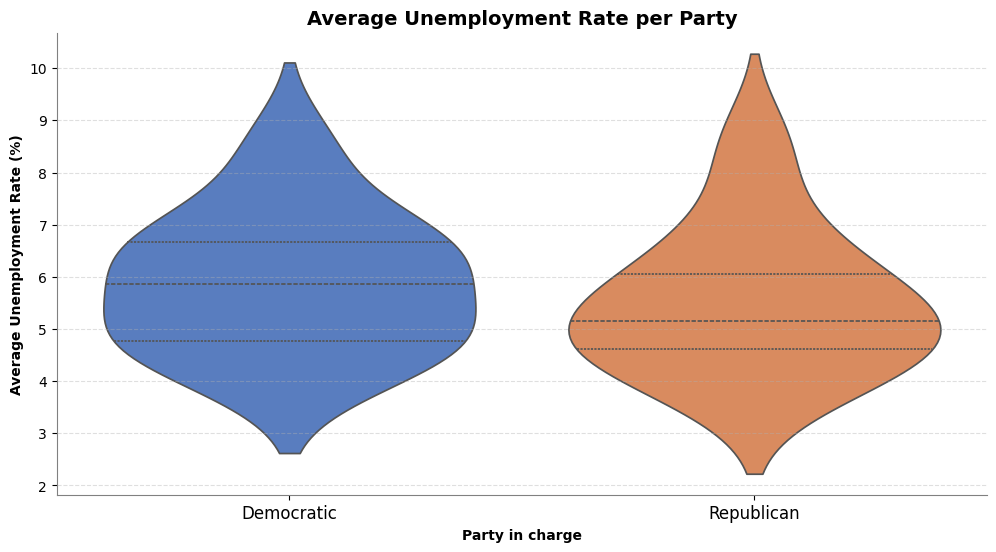

In [15]:

# Calculate the average unemployment rate for each party in charge
unrate_party = party_incharge.groupby("Party in charge")["previous 4 year average unemployment rate"].mean()
unrate_party.name = "Average Unemployment Rate"
unrate_party

# Create a violin plot for the unemployment rate by party
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Party in charge', y='previous 4 year average unemployment rate', data=party_incharge, inner="quart", palette="muted")

# Customize plot appearance
ax.yaxis.grid(True, linestyle="--", alpha=0.4)  # Add grid lines for better readability
ax.spines["top"].set_visible(False)  # Remove top spine
ax.spines["right"].set_visible(False)  # Remove right spine
ax.spines["left"].set_color("gray")  # Set left spine color to gray
ax.spines["bottom"].set_color("gray")  # Set bottom spine color to gray
ax.tick_params(axis="x", labelsize=12, rotation=0)  # Adjust x-axis label size and rotation

# Set title and labels
ax.set_title("Average Unemployment Rate per Party", fontsize=14, fontweight="bold")
ax.set_xlabel("Party in charge", fontsize=10, fontweight="bold")
ax.set_ylabel("Average Unemployment Rate (%)", fontsize=10, fontweight="bold")

plt.show()


During democratic party mandate the average unemployment rate is higher.   


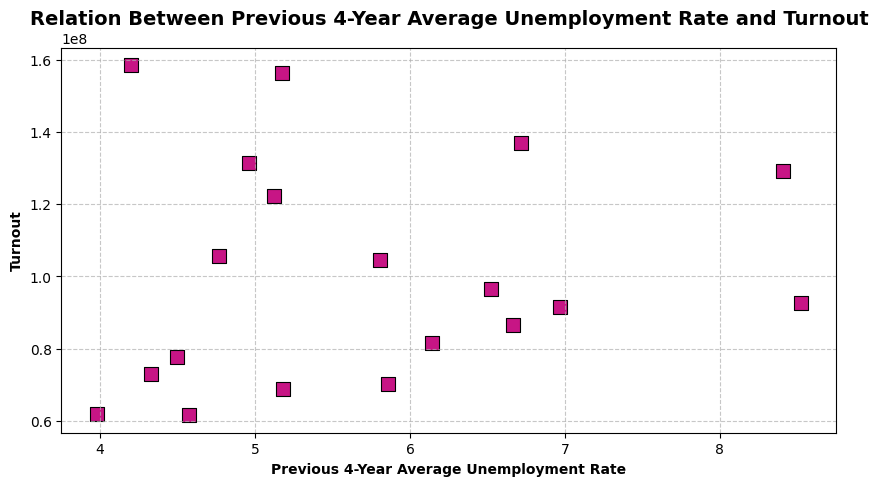

In [16]:
# Scatter plot for Previous 4-Year Average Unemployment Rate vs Turnout
ax = sns.scatterplot(data=unrate_for_elections, x="previous 4 year average unemployment rate", y="Turnout", marker="s", color="mediumvioletred", edgecolor="black", s=100)

plt.xlabel("Previous 4-Year Average Unemployment Rate", fontsize=10, fontweight="bold")
plt.ylabel("Turnout", fontsize=10, fontweight="bold")

# Add gridlines for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Add a title to the plot
plt.title("Relation Between Previous 4-Year Average Unemployment Rate and Turnout", fontsize=14, fontweight="bold")

# Display the plot
plt.show()

In [17]:
# Calculate the Pearson correlation between the two variables
correlation = unrate_for_elections["previous 4 year average unemployment rate"].corr(unrate_for_elections["Turnout"])

# Display the correlation result
print(f"The Pearson correlation between Previous 4-Year Average Unemployment Rate and Turnout is: {correlation:.2f}")


The Pearson correlation between Previous 4-Year Average Unemployment Rate and Turnout is: 0.12


The correlation coefficient of 0.12 suggests a very weak relationship that is not likely to be meaningful. Furthermore, the scatter plot's lack of correlation confirms that there's no clear trend or pattern between the variables. We might conclude that these two variables, Previous 4-Year Average Unemployment Rate and Turnout, do not have a strong enough relationship to make any reliable inferences.